# Data Sources

The `Pipeline0` notebook assembles the GeoDataframes needed for the `Pipeline2` notebook. The GitHub repository comes pre-loaded with these GeoDataFrames and CSV file. The `Pipeline1` notebook downloads the NetCD4 NO2 TROPOMI files from the Copernicus Open Data Hub.

If you see the following in the data folder, that means you can skip running this notebook:

1. `data/africa1_gdf.pickle`
2. `data/africa0_gdf.pickle`
3. `data/asia1_gdf.pickle`
4. `data/asia0_gdf.pickle`
5. `data/americas1_gdf.pickle`
6. `data/americas0_gdf.pickle`


## 1. Download country dataset with regional codes

In [84]:
!wget https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv -O data/countries.csv

--2020-06-19 11:59:01--  https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.56.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.56.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20759 (20K) [text/plain]
Saving to: ‘data/countries.csv’

data/countries.csv  100%[===================>]  20.27K  --.-KB/s    in 0.02s   

2020-06-19 11:59:01 (1.05 MB/s) - ‘data/countries.csv’ saved [20759/20759]



In [85]:
import pandas as pd

countries_df = pd.read_csv('data/countries.csv')

countries_df.rename(columns={'alpha-3':'iso3','alpha-2':'iso2'}, inplace=True)
countries_df.drop(columns=['iso_3166-2','country-code','region-code','sub-region-code',\
                           'intermediate-region-code'], inplace=True)
countries_df

,name,iso2,iso3,region,sub-region,intermediate-region
0,Afghanistan,AF,AFG,Asia,Southern Asia,NaN
1,Åland Islands,AX,ALA,Europe,Northern Europe,NaN
2,Albania,AL,ALB,Europe,Southern Europe,NaN
3,Algeria,DZ,DZA,Africa,Northern Africa,NaN
4,American Samoa,AS,ASM,Oceania,Polynesia,NaN
...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,Oceania,Polynesia,NaN
245,Western Sahara,EH,ESH,Africa,Northern Africa,NaN
246,Yemen,YE,YEM,Asia,Western Asia,NaN
247,Zambia,ZM,ZMB,Africa,Sub-Saharan Africa,Eastern Africa


## 2. Download GADM whole world shapefiles

https://biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip

In [86]:
!bash download_gadm.sh

--2020-06-19 11:59:02--  https://biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip
Resolving biogeo.ucdavis.edu (biogeo.ucdavis.edu)... 128.120.228.172
Connecting to biogeo.ucdavis.edu (biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip [following]
--2020-06-19 11:59:03--  https://data.biogeo.ucdavis.edu/data/gadm3.6/gadm36_levels_shp.zip
Resolving data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)... 128.120.228.172
Connecting to data.biogeo.ucdavis.edu (data.biogeo.ucdavis.edu)|128.120.228.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1262756764 (1.2G) [application/zip]
Saving to: ‘data/gadm36/gadm36_levels_shp.zip’

data/gadm36/gadm36_ 100%[===================>]   1.18G  15.1MB/s    in 83s     

2020-06-19 12:00:26 (14.5 MB/s) - ‘data/gadm36/gadm36_levels_shp.zip’ saved [1262756764/1262756764]

Archive:  data/gadm36/gad

### 2a. Load Levels 0 and 1 shape files

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt

gadm1_gdf = gpd.read_file('data/gadm36/gadm36_1.shp')

In [88]:
gadm0_gdf = gpd.read_file('data/gadm36/gadm36_0.shp')

### 2b. Merge Levels 0 and 1 with country regional code data set

In [89]:
gadm1a_gdf = gadm1_gdf.merge(countries_df, left_on='GID_0', right_on='iso3', how='inner')

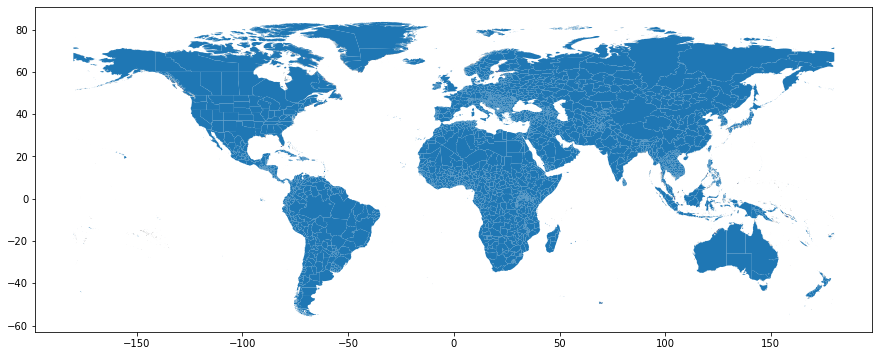

In [90]:
gadm1a_gdf.plot(figsize=(15,10))

In [91]:
gadm0a_gdf = gadm0_gdf.merge(countries_df, left_on='GID_0', right_on='iso3', how='inner')

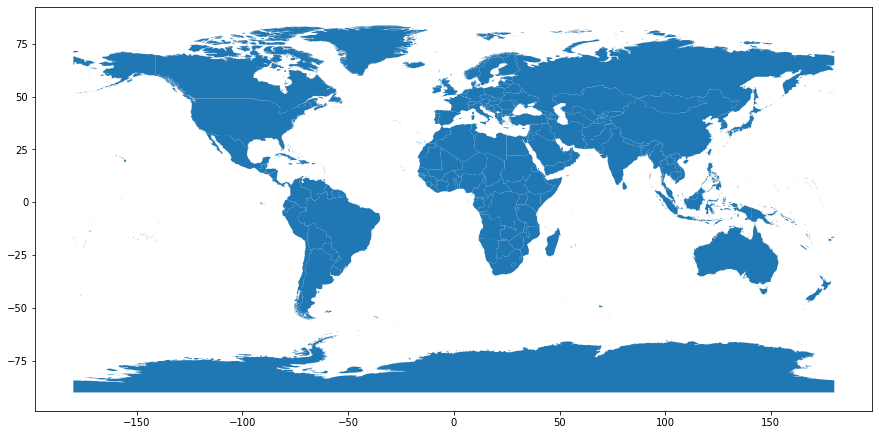

In [92]:
gadm0a_gdf.plot(figsize=(15,10))

### 2c. Filter continents - GADM Level 1 (with provinces)

In [93]:
gadm1a_gdf['region'].unique()

array(['Asia', 'Africa', 'Europe', 'Americas', 'Oceania'], dtype=object)

In [94]:
africa1_gdf = gadm1a_gdf[gadm1a_gdf['region']=='Africa']

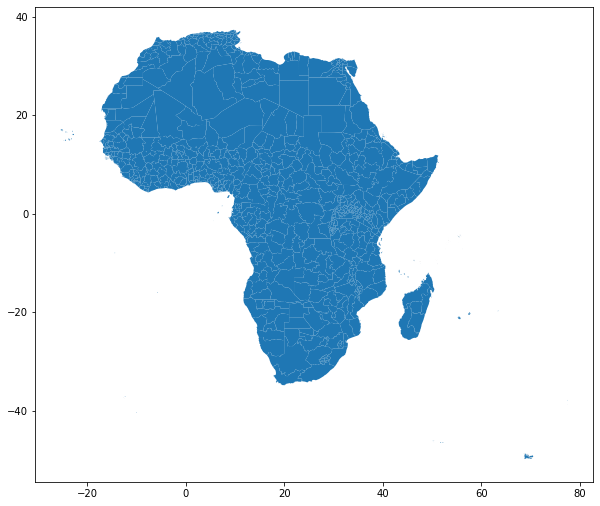

In [95]:
africa1_gdf.plot(figsize=(10,10))

In [96]:
asia1_gdf = gadm1a_gdf[gadm1a_gdf['region']=='Asia']

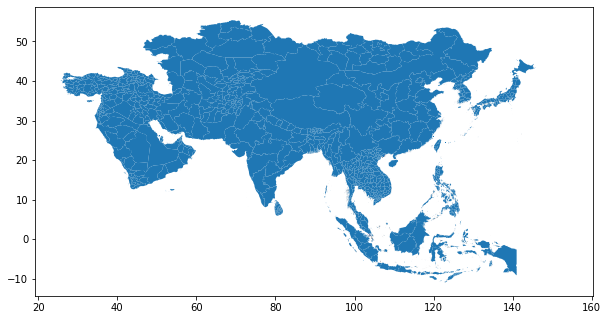

In [97]:
asia1_gdf.plot(figsize=(10,10))

In [98]:
americas1_gdf = gadm1a_gdf[gadm1a_gdf['region']=='Americas']

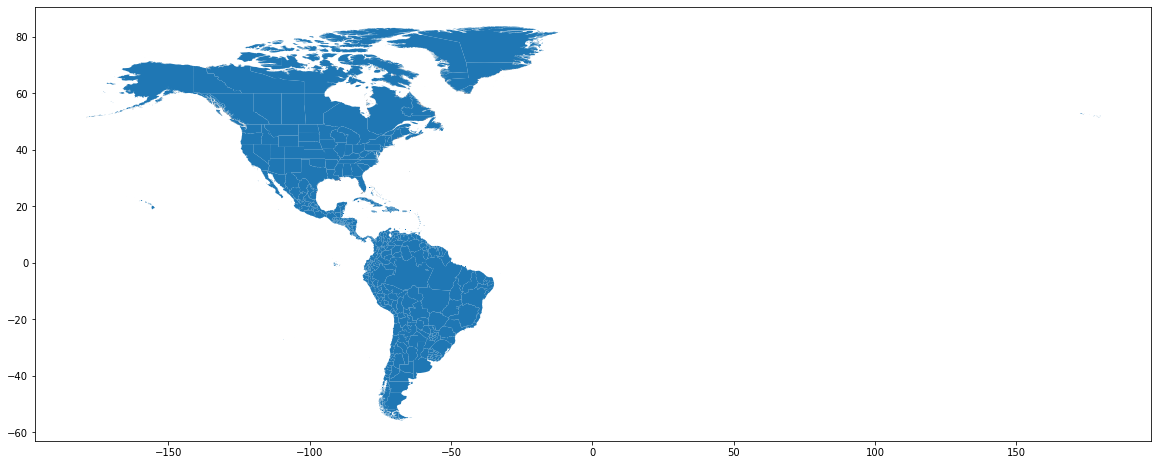

In [99]:
americas1_gdf.plot(figsize=(20,20))

### 2d. Filter continents - GADM Level 0 (country boundaries)

In [100]:
africa0_gdf = gadm0a_gdf[gadm0a_gdf['region']=='Africa']

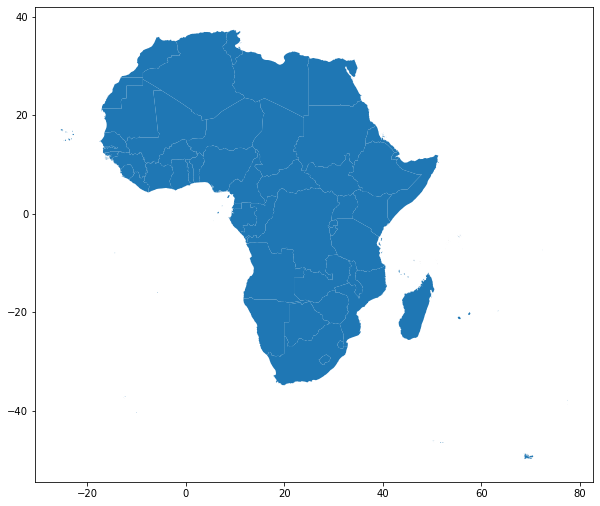

In [101]:
africa0_gdf.plot(figsize=(10,10))

In [102]:
asia0_gdf = gadm0a_gdf[gadm0a_gdf['region']=='Asia']

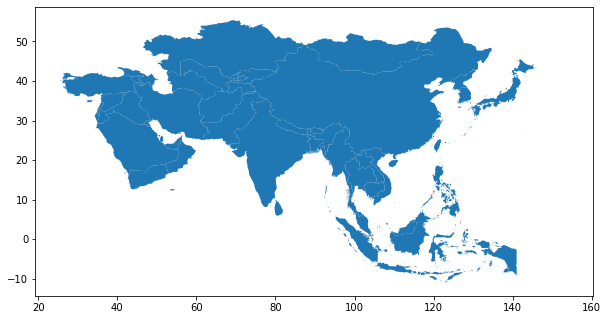

In [103]:
asia0_gdf.plot(figsize=(10,10))

In [104]:
americas0_gdf = gadm0a_gdf[gadm0a_gdf['region']=='Americas']

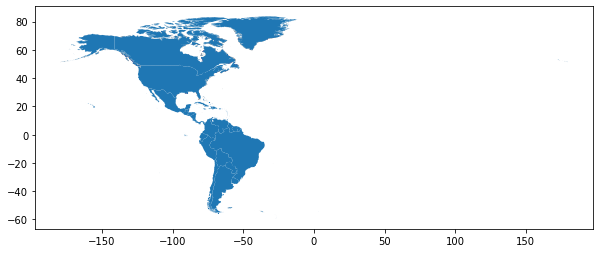

In [105]:
americas0_gdf.plot(figsize=(10,10))

## 3. Pickle GDFs

In [106]:
africa1_gdf.to_pickle('data/africa1_gdf.pickle')
africa0_gdf.to_pickle('data/africa0_gdf.pickle')
asia1_gdf.to_pickle('data/asia1_gdf.pickle')
asia0_gdf.to_pickle('data/asia0_gdf.pickle')
americas1_gdf.to_pickle('data/americas1_gdf.pickle')
americas0_gdf.to_pickle('data/americas0_gdf.pickle')

That's the end of the `NB01-Data-Sources` notebook.